Задача 1:Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

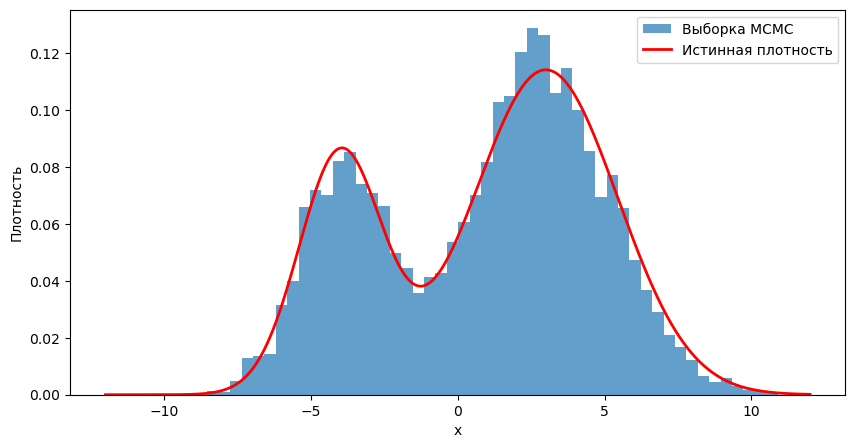

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def target_density(x):
    return 0.3 * norm(-4, np.sqrt(2)).pdf(x) + 0.7 * norm(3, np.sqrt(6)).pdf(x)

def proposal(current, sigma=2.0):
    return current + sigma * np.random.randn()
    
def metropolis(start, target, proposal_func, n_iter, sigma=2.0):
    current = start  
    samples = [current]
    
    for i in range(n_iter):
        proposed = proposal_func(current, sigma)  
        alpha = target(proposed) / target(current)

        if np.random.rand() < alpha:
            current = proposed
        samples.append(current)
    
    return np.array(samples)

samples = metropolis(start=0, target=target_density, proposal_func=proposal, n_iter=10000, sigma=2.0)
samples_clean = samples[1000:]

x = np.linspace(-12, 12, 1000)
true_density = 0.3 * norm(-4, np.sqrt(2)).pdf(x) + 0.7 * norm(3, np.sqrt(6)).pdf(x)

plt.figure(figsize=(10, 5))
plt.hist(samples_clean, bins=50, density=True, alpha=0.7, label='Выборка MCMC')
plt.plot(x, true_density, 'r-', linewidth=2, label='Истинная плотность')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Задача 2:
Оценить  En(ξ)  для графа 10х10
Построить график распределеиня  n(ξ) 
Совет: проверьте алгоритм на графах размера  2×2. Ваш ответ должет быть близок к точному ответу (0+1+1+1+1+2+2)/7 = 8/7.

Оценка E[n(ξ)] для графа 10x10: 23.9149


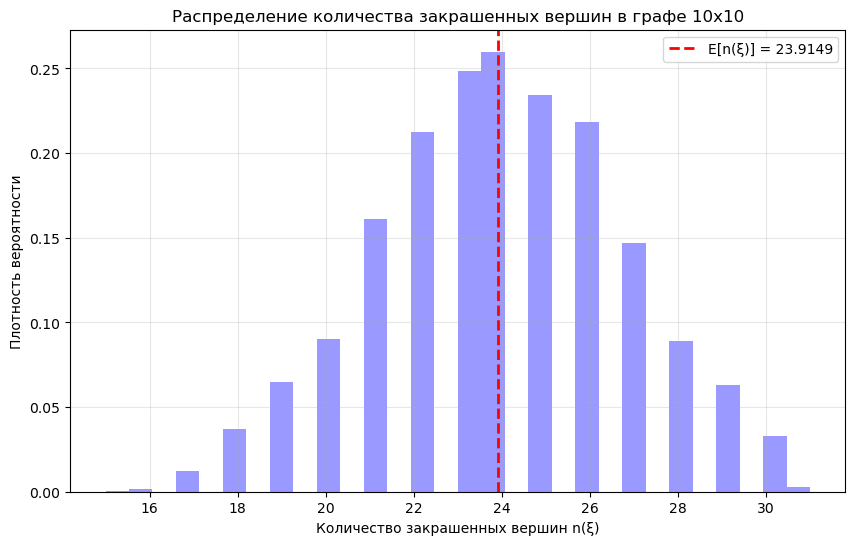


Проверка на графе 2x2:
Оценка E[n(ξ)] для графа 2x2: 1.1512
Точное значение для графа 2x2: 1.1429
Разница: 0.0083


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

def create_grid_graph(n):
    G = nx.Graph()
    for i in range(n):
        for j in range(n):
            G.add_node((i, j))
            if i > 0:
                G.add_edge((i, j), (i-1, j))
            if j > 0:
                G.add_edge((i, j), (i, j-1))
    return G

def is_valid_configuration(config, G):
    for node in G.nodes():
        if config[node] == 1:
            for neighbor in G.neighbors(node):
                if config[neighbor] == 1:
                    return False
    return True

def count_ones(config):
    return sum(config.values())

def mcmc_sampling(G, num_samples=10000, burn_in=1000):
    n = len(G.nodes())
    current_config = {node: 0 for node in G.nodes()}
    
    samples = []
    counts = []
    nodes_list = list(G.nodes())
    
    for step in range(num_samples + burn_in):
        node = random.choice(nodes_list)
        
        new_config = current_config.copy()
        new_config[node] = 1 - current_config[node]
        
        if is_valid_configuration(new_config, G):
            if random.random() < 0.5:
                current_config = new_config
        
        if step >= burn_in:
            samples.append(current_config.copy())
            counts.append(count_ones(current_config))
    
    return samples, counts

G = create_grid_graph(10)
samples, counts = mcmc_sampling(G, num_samples=10000, burn_in=5000)

expected_n = np.mean(counts)
print(f"Оценка E[n(ξ)] для графа 10x10: {expected_n:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, density=True, alpha=0.4, color='blue')
plt.axvline(expected_n, color='red', linestyle='--', linewidth=2, label=f'E[n(ξ)] = {expected_n:.4f}')
plt.xlabel('Количество закрашенных вершин n(ξ)')
plt.ylabel('Плотность вероятности')
plt.title('Распределение количества закрашенных вершин в графе 10x10')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\nПроверка на графе 2x2:")
G_small = create_grid_graph(2)
samples_small, counts_small = mcmc_sampling(G_small, num_samples=5000, burn_in=1000)
expected_n_small = np.mean(counts_small)
print(f"Оценка E[n(ξ)] для графа 2x2: {expected_n_small:.4f}")
print(f"Точное значение для графа 2x2: {8/7:.4f}")
print(f"Разница: {abs(expected_n_small - 8/7):.4f}")